In [41]:
dirs=[]
for i in range(999):
    dirs.append('run_{}'.format(i))
#dirs

In [32]:
import os
import re; import pandas as pd
params=[]
generated_params = []
error_list=[]
filename = 'minuit.out.txt'
infile = open(filename, 'r')
lines = infile.readlines()
#print(lines[104])
# for line in lines[106:109, 111:120]:
from itertools import *
#make a chain iterator of our wanted lines from the output file, we want to exclude
#those lines that have "constant" for the error, since these are not the PDF parameters and we can't use them
chain = chain(islice(lines, 106, 111), islice(lines, 111, 121))
#for line in lines[106:121]:
for line in chain:
    #print(line)
    #words = line.strip().split('\s+')#the delimeter is 6 spaces to separate the columns
    words = line.strip().split()
    
    #words = re.split(r"(?: '\s*)\s*", line.strip())
    #df = pd.read_table(words)
    #use re noncapture group, defined as (?:...)since we dont want the separators in our 
    #result.
    #print(words[2])
    values= words[2]
    errors=words[3]
    #print(errors)
    for value in values.split():
#         #print(i)
         params.append(float(value))
    for error in errors.split():
        if error =='constant':
            error_list.append(0.0)
        else:
            error_list.append(float(error))
    
#         sampled_param = np.random.uniform(low = j-error, high=j+error)
# means=np.array(means).astype(float)
        
#print(means)
    #print(values)
    #print(words[2].split())
    #values= words[2].split()[0]
    #print(values)4
    #for ind, word in enumerate(split_line):
    #print(split_line)
        #print(word)
#     with open('minuit.oin.txt', 'r') as second:
#         split_line
#         second.write()
    
    
infile.close()
params = np.asarray(params); error_list =np.asarray(error_list)

#############GENERATE PARAMETERS
generated_params=[]
for i in range(len(params)):
    param, error = params[i], error_list[i]
    generated_param = np.random.uniform(low = param-error, high=param+error)
    generated_params.append(generated_param)



    
    
    
print( params, generated_params, '\n\n', len(params), len(generated_params))

[-0.061856  5.5593    0.16618  -0.383    25.        0.81056   4.8239
  9.9226    1.0301    4.8456    7.0603    1.5439    0.26877  -0.12732
  9.581   ] [-0.0846654823887331, 5.506102562191948, 0.18445281340257422, -0.37959415401681723, 25.0, 0.8058024866748879, 4.795739345212018, 10.070465988706875, 1.0129295052202743, 4.963277872290885, 7.159330122217122, 1.2746922906004954, 0.26591411371510476, -0.12568898077743426, 10.04014174081303] 

 15 15


In [1]:
import numpy as np
MVN = np.load('MVN_1000.npy')
MVN

array([[-0.05017852,  5.57279299,  0.15616591, ...,  0.26367197,
        -0.12718829,  9.55921401],
       [-0.03419613,  5.75028089,  0.12165164, ...,  0.26657549,
        -0.12936777,  8.75441357],
       [-0.06667226,  5.45172061,  0.1728878 , ...,  0.26661517,
        -0.12773386,  9.5000718 ],
       ...,
       [-0.09651571,  5.35481047,  0.21191788, ...,  0.27467257,
        -0.12683254,  9.38193261],
       [-0.05927727,  5.5515632 ,  0.15036527, ...,  0.27516739,
        -0.12504536, 10.16263003],
       [-0.0768264 ,  5.69650931,  0.1859611 , ...,  0.26961861,
        -0.12606389,  9.06683514]])

In [2]:
!pwd

/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories


In [3]:
MVN[:,13][0]

9.559214009450637

In [4]:
MVN.shape

(1000, 14)

In [5]:
for i in range(13):
    print(MVN[:,i][0])

-0.05017851620525688
5.572792986743907
0.15616590924587528
-0.38366701550323024
0.818069541207529
4.835379591751817
9.790130249200198
1.0230524854971554
4.911940708361538
7.280558891842833
1.5728035689365478
0.26367197329024783
-0.12718829288538994


In [6]:
import os
os.chdir('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories')

## Make run directories and fill them with input files

In [ ]:


import os; import subprocess as sp;from shutil import copyfile
dirs=[]
for i in range(1000):
    dirs.append('run_{}'.format(i))
#dirs

os.chdir('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories')
steering = 'steering.txt'
for run_ind, run in enumerate(dirs):
    os.makedirs(run, exist_ok=True)
    print(os.path.abspath(run))
    path=os.path.abspath(run)
    copyfile('ewparam.txt', os.path.join(path, 'ewparam.txt'))
    copyfile('steering.txt', os.path.join(path, 'steering.txt'))
    minuit_in_path = os.path.join(path, 'minuit.in.txt')
    with open(minuit_in_path, 'w') as second:
        #second = os.path.abspath(second)
        second.write('set title\n')
        second.write('new  14p HERAPDF\n')
        second.write('parameters\n')
        #lets put 0 for the fourth column, meaning that this parameter is fixed
        second.write('    '+ '2'+ '    ' + "'Bg'"+'    '+str(MVN[:,0][run_ind])+ '    '+'0.\n')
        second.write('    '+ '3'+ '    ' + "'Cg'"+'    '+str(MVN[:,1][run_ind])+ '    '+'0.\n')
        second.write('    '+ '7'+ '    ' + "'Aprig'"+'    '+str(MVN[:,2][run_ind])+ '    '+'0.\n')
        second.write('    '+ '8'+ '    ' + "'Bprig'"+'    '+str(MVN[:,3][run_ind])+ '    '+'0.\n')
        second.write('    '+ '9'+ '    ' + "'Cprig'"+'    '+str(25.000)+ '    '+'0.\n')
        #note that Cprig is a constant, not a parameter value!
        second.write('    '+ '12'+ '    ' + "'Buv'"+'    '+str(MVN[:,4][run_ind])+ '    '+'0.\n')
        second.write('    '+ '13'+ '    ' + "'Cuv'"+'    '+str(MVN[:,5][run_ind])+ '    '+'0.\n')
        second.write('    '+ '15'+ '    ' + "'Euv'"+'    '+str(MVN[:,6][run_ind])+ '    '+'0.\n')
        second.write('    '+ '22'+ '    ' + "'Bdv'"+'    '+str(MVN[:,7][run_ind])+ '    '+'0.\n')
        second.write('    '+ '23'+ '    ' + "'Cdv'"+'    '+str(MVN[:,8][run_ind])+ '    '+'0.\n')
        second.write('    '+ '33'+ '    ' + "'CUbar'"+'    '+str(MVN[:,9][run_ind])+ '    '+'0.\n')
        second.write('    '+ '34'+ '    ' + "'DUbar'"+'    '+str(MVN[:,10][run_ind])+ '    '+'0.\n')
        second.write('    '+ '41'+ '    ' + "'ADbar'"+'    '+str(MVN[:,11][run_ind])+ '    '+'0.\n')
        second.write('    '+ '42'+ '    ' + "'BDbar'"+'    '+str(MVN[:,12][run_ind])+ '    '+'0.\n')
        second.write('    '+ '43'+ '    ' + "'CDbar'"+'    '+str(MVN[:,13][run_ind])+ '    '+'0.\n')
        second.write('\n\n\n')
        #for complete fit, do
#         second.write('migrad 200000\n')
#         second.write('hesse\n')
#         second.write('set print 3\n\n')
        #to run only 3 iterations, do 
        second.write('call fcn 2\n')
        second.write('*migrad 200000\n')
        second.write('*hesse\n')
        second.write('set print 3\n\n')
        second.write('return')
    os.chdir(path)
    sp.run('ln -s /home/ali/Desktop/Research/xfitter/xfitter-2.0.1/datafiles', shell=True)
    sp.run('xfitter', shell=True)
    os.chdir('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories')

    #sp.run('cp ./ewparam.txt run', shell=True)

/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_79
/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_80
/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_81
/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_82
/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_83
/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_84
/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_85
/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_86
/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_87
/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_88
/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_89

In [ ]:


import os; import subprocess as sp;from shutil import copyfile
dirs=[]
for i in range(1000):
    dirs.append('run_{}'.format(i))
#dirs

os.chdir('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories')
steering = 'steering.txt'
for run_ind, run in enumerate(dirs):
    os.makedirs(run, exist_ok=True)
    print(os.path.abspath(run))
    path=os.path.abspath(run)
    copyfile('ewparam.txt', os.path.join(path, 'ewparam.txt'))
    copyfile('steering.txt', os.path.join(path, 'steering.txt'))
    minuit_in_path = os.path.join(path, 'minuit.in.txt')
    with open(minuit_in_path, 'w') as second:
        #second = os.path.abspath(second)
        second.write('set title\n')
        second.write('new  14p HERAPDF\n')
        second.write('parameters\n')
        #lets put 0 for the fourth column, meaning that this parameter is fixed
        second.write('    '+ '2'+ '    ' + "'Bg'"+'    '+str(MVN[:,0][run_ind])+ '    '+'0.\n')
        second.write('    '+ '3'+ '    ' + "'Cg'"+'    '+str(MVN[:,1][run_ind])+ '    '+'0.\n')
        second.write('    '+ '7'+ '    ' + "'Aprig'"+'    '+str(MVN[:,2][run_ind])+ '    '+'0.\n')
        second.write('    '+ '8'+ '    ' + "'Bprig'"+'    '+str(MVN[:,3][run_ind])+ '    '+'0.\n')
        second.write('    '+ '9'+ '    ' + "'Cprig'"+'    '+str(25.000)+ '    '+'0.\n')
        #note that Cprig is a constant, not a parameter value!
        second.write('    '+ '12'+ '    ' + "'Buv'"+'    '+str(MVN[:,4][run_ind])+ '    '+'0.\n')
        second.write('    '+ '13'+ '    ' + "'Cuv'"+'    '+str(MVN[:,5][run_ind])+ '    '+'0.\n')
        second.write('    '+ '15'+ '    ' + "'Euv'"+'    '+str(MVN[:,6][run_ind])+ '    '+'0.\n')
        second.write('    '+ '22'+ '    ' + "'Bdv'"+'    '+str(MVN[:,7][run_ind])+ '    '+'0.\n')
        second.write('    '+ '23'+ '    ' + "'Cdv'"+'    '+str(MVN[:,8][run_ind])+ '    '+'0.\n')
        second.write('    '+ '33'+ '    ' + "'CUbar'"+'    '+str(MVN[:,9][run_ind])+ '    '+'0.\n')
        second.write('    '+ '34'+ '    ' + "'DUbar'"+'    '+str(MVN[:,10][run_ind])+ '    '+'0.\n')
        second.write('    '+ '41'+ '    ' + "'ADbar'"+'    '+str(MVN[:,11][run_ind])+ '    '+'0.\n')
        second.write('    '+ '42'+ '    ' + "'BDbar'"+'    '+str(MVN[:,12][run_ind])+ '    '+'0.\n')
        second.write('    '+ '43'+ '    ' + "'CDbar'"+'    '+str(MVN[:,13][run_ind])+ '    '+'0.\n')
        second.write('\n\n\n')
        #for complete fit, do
#         second.write('migrad 200000\n')
#         second.write('hesse\n')
#         second.write('set print 3\n\n')
        #to run only 3 iterations, do 
        second.write('call fcn 3\n')
        second.write('*migrad 200000\n')
        second.write('*hesse\n')
        second.write('set print 3\n\n')
        second.write('return')

    
for run_ind, run in enumerate(dirs):
    os.chdir('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories')
    path=os.path.abspath(run)
    os.chdir(path)
    sp.run('ln -s /home/ali/Desktop/Research/xfitter/xfitter-2.0.1/datafiles', shell=True)
    sp.run('xfitter', shell=True)
    #sp.run('cp ./ewparam.txt run', shell=True)

In [ ]:


# import os; import subprocess as sp;from shutil import copyfile
# steering = 'steering.txt'
# for run in dirs:
#     os.makedirs(run, exist_ok=True)
#     print(os.path.abspath(run))
#     path=os.path.abspath(run)
#     copyfile('ewparam.txt', os.path.join(path, 'ewparam.txt'))
#     copyfile('steering.txt', os.path.join(path, 'steering.txt'))
#     minuit_in_path = os.path.join(path, 'minuit.in.txt')
#     with open(minuit_in_path, 'w') as second:
#         #second = os.path.abspath(second)
#         second.write('set title\n')
#         second.write('new  14p HERAPDF\n')
#         second.write('parameters\n')
#         #lets put 0 for the fourth column, meaning that this parameter is fixed
#         second.write('    '+ '2'+ '    ' + "'Bg'"+'    '+str(generated_params[0])+ '    '+'0.\n')
#         second.write('    '+ '3'+ '    ' + "'Cg'"+'    '+str(generated_params[1])+ '    '+'0.\n')
#         second.write('    '+ '7'+ '    ' + "'Aprig'"+'    '+str(generated_params[2])+ '    '+'0.\n')
#         second.write('    '+ '8'+ '    ' + "'Bprig'"+'    '+str(generated_params[3])+ '    '+'0.\n')
#         second.write('    '+ '9'+ '    ' + "'Cprig'"+'    '+str(generated_params[4])+ '    '+'0.\n')
#         second.write('    '+ '12'+ '    ' + "'Buv'"+'    '+str(generated_params[5])+ '    '+'0.\n')
#         second.write('    '+ '13'+ '    ' + "'Cuv'"+'    '+str(generated_params[6])+ '    '+'0.\n')
#         second.write('    '+ '15'+ '    ' + "'Euv'"+'    '+str(generated_params[7])+ '    '+'0.\n')
#         second.write('    '+ '22'+ '    ' + "'Bdv'"+'    '+str(generated_params[8])+ '    '+'0.\n')
#         second.write('    '+ '23'+ '    ' + "'Cdv'"+'    '+str(generated_params[9])+ '    '+'0.\n')
#         second.write('    '+ '33'+ '    ' + "'CUbar'"+'    '+str(generated_params[10])+ '    '+'0.\n')
#         second.write('    '+ '34'+ '    ' + "'DUbar'"+'    '+str(generated_params[11])+ '    '+'0.\n')
#         second.write('    '+ '41'+ '    ' + "'ADbar'"+'    '+str(generated_params[12])+ '    '+'0.\n')
#         second.write('    '+ '42'+ '    ' + "'BDbar'"+'    '+str(generated_params[13])+ '    '+'0.\n')
#         second.write('    '+ '43'+ '    ' + "'CDbar'"+'    '+str(generated_params[14])+ '    '+'0.\n')
#         second.write('\n\n\n')
#         second.write('migrad 200000\n')
#         second.write('hesse\n')
#         second.write('set print 3\n\n')
#         second.write('return')

#     #sp.run('cp ./ewparam.txt run', shell=True)

In [16]:
weights=[]
dirs=[]
for i in range(79):
    dirs.append('run_{}'.format(i))
    
os.chdir('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories')
for run_ind, run in enumerate(dirs):
    run_path = os.path.abspath(run)
    output_path = os.path.join(run_path, 'output')
    os.chdir(output_path)
    #print(os.getcwd())
    with open('Results.txt', 'r') as f:
        lines = f.readlines()
        chi2_line = lines[12]
        chi2 = chi2_line.split()[2]
        weights.append(float(chi2))
    os.chdir('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories')


In [17]:
weights

[95.10829739595722,
 88.36649887317249,
 96.71190550627526,
 94.29873991950457,
 97.30897292853665,
 98.00961382324405,
 87.79403102245416,
 95.18634946646027,
 89.1430027297724,
 94.2223279840484,
 97.18946256331023,
 93.68440111788513,
 92.21127961841158,
 92.22609220492049,
 88.48653515538105,
 93.05803080549978,
 92.77680785180716,
 95.18733339751395,
 92.46822793332824,
 94.01126134209781,
 95.37221644694118,
 92.52672267594309,
 93.1121993950845,
 94.71741463092883,
 97.73333186392142,
 90.24200240284131,
 93.39200574893023,
 101.35528801491415,
 94.1637985628659,
 96.40345918676425,
 96.60212691610842,
 87.29616758562926,
 92.3041604800532,
 87.05099899181785,
 94.84110078588785,
 98.04375021712615,
 93.59687817106449,
 102.70374423805787,
 94.05293727105322,
 91.32532673634705,
 93.81666177844268,
 102.25308943741742,
 88.13647885567501,
 97.52967761950764,
 90.42110878612696,
 93.12336415491664,
 92.76762053232957,
 96.40188345130727,
 86.49435931060609,
 88.39070098733848,
 1

In [10]:
first_fit=MVN[:,0:13][0]; first_weight=weights[0]
print('the first fit parameter values are: ', first_fit, '\nthe associated weight for this fit is', first_weight)
print('hence the number of fits has to be the same as the number of weights')

the first fit parameter values are:  [-0.05017852  5.57279299  0.15616591 -0.38366702  0.81806954  4.83537959
  9.79013025  1.02305249  4.91194071  7.28055889  1.57280357  0.26367197
 -0.12718829] 
the associated weight for this fit is 95.10829739595722
hence the number of fits has to be the same as the number of weights


(array([ 295.15506406,  877.54816561,  759.81012724, 1399.17966387,
        1754.30736478,  836.94265302,  367.64911619,  649.51282951,
          96.40345919,  380.8703733 ]),
 array([-0.11555205, -0.10364354, -0.09173504, -0.07982653, -0.06791803,
        -0.05600952, -0.04410101, -0.03219251, -0.020284  , -0.0083755 ,
         0.00353301]),
 <BarContainer object of 10 artists>)

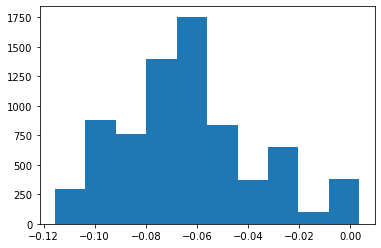

In [19]:
import matplotlib.pyplot as plt
Bg = first_fit=MVN[:,0][0:79]
plt.hist(Bg, bins=10, weights=weights)

the number of weights is the same as the number of fits: for each fit there is a different weight:

First fit: MVN[:,1:13][]

In [24]:
import re

os.chdir('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories/run_1/output')
pattern  = re.compile(r'Correlated Chi2')
#we can use re to find the ch^2, or we can see that the correlated chi2 is lways on the 13th line!
with open('Results.txt', 'r') as f:
    lines = f.readlines()
    chi2_line = lines[12]
    chi2 = chi2_line.split()[2]
    #lines = f.read()

    #matches = pattern.finditer(lines)
        
    print(chi2)

86.734185754044333


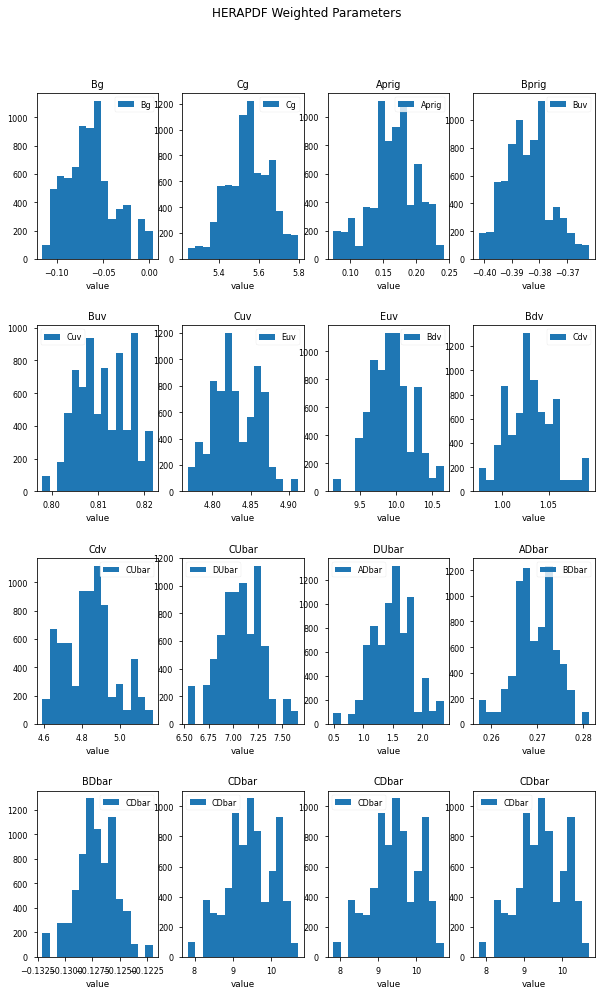

In [21]:
import seaborn as sns
colors=sns.color_palette("rocket",3)
# sns.set_style("white")

# sns.set_context("poster")
plt.style.use('seaborn-paper')

fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(10,15))
axes[0,0].hist(MVN[:,0][0:79],bins=15, label='Bg',weights=weights)
#axes[0,0].set(title='Bg', xlabel='value')
axes[0,1].hist(MVN[:,1][0:79],bins=15, label='Cg',weights=weights)
axes[0,2].hist(MVN[:,2][0:79],bins=15,label='Aprig',weights=weights)
axes[0,3].hist(MVN[:,3][0:79],bins=15, label='Buv',weights=weights)
axes[1,0].hist(MVN[:,4][0:79],bins=15, label='Cuv',weights=weights)
axes[1,1].hist(MVN[:,5][0:79],bins=15,label='Euv',weights=weights)
axes[1,2].hist(MVN[:,6][0:79],bins=15, label='Bdv',weights=weights)
axes[1,3].hist(MVN[:,7][0:79],bins=15, label='Cdv',weights=weights)
axes[2,0].hist(MVN[:,8][0:79],bins=15, label='CUbar',weights=weights)
axes[2,1].hist(MVN[:,9][0:79],bins=15,label='DUbar',weights=weights)
axes[2,2].hist(MVN[:,10][0:79],bins=15,label='ADbar',weights=weights)
axes[2,3].hist(MVN[:,11][0:79],bins=15,label='BDbar',weights=weights)
axes[3,0].hist(MVN[:,12][0:79],bins=15,label='CDbar',weights=weights)
axes[3,1].hist(MVN[:,13][0:79],bins=15,label='CDbar',weights=weights)
axes[3,2].hist(MVN[:,13][0:79],bins=15,label='CDbar',weights=weights)
axes[3,3].hist(MVN[:,13][0:79],bins=15,label='CDbar',weights=weights)
plt.tight_layout(); plt.suptitle('HERAPDF Weighted Parameters')
titles = ['Bg','Cg','Aprig','Bprig','Buv','Cuv','Euv','Bdv','Cdv','CUbar','DUbar','ADbar','BDbar','CDbar','CDbar','CDbar','CDbar']
for i, ax in enumerate(axes.flatten()):
    ax.set(title=titles[i], xlabel='value')
    ax.legend()
# plt.minorticks_on()
# plt.tick_params(direction='in',right=True, top=True)
# plt.tick_params(labelsize=14)
# plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9 , top=0.9, wspace=0.2, hspace=0.4)
#plt.savefig('HERAPDF_params_MVN.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
!pwd

/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/make_MVN_directories


In [ ]:
chi2 = []
# for run_ind, run in enumerate(dirs):
    

array([[ 2.43015610e-03,  5.56822546e+00,  9.00654391e-02, ...,
         2.66762789e-01, -1.29259871e-01,  9.41650924e+00],
       [-3.96051836e-02,  5.57877192e+00,  1.37545153e-01, ...,
         2.69146806e-01, -1.28752170e-01,  9.44747927e+00],
       [-8.93053616e-02,  5.55656587e+00,  2.14202311e-01, ...,
         2.70642861e-01, -1.27310272e-01,  8.94872670e+00],
       ...,
       [-1.50939824e-02,  5.62641018e+00,  1.02490604e-01, ...,
         2.66648891e-01, -1.27935839e-01,  1.08484684e+01],
       [-6.35174434e-02,  5.52292829e+00,  1.67342741e-01, ...,
         2.74442476e-01, -1.25928761e-01,  9.39112684e+00],
       [-8.53485849e-02,  5.50832597e+00,  1.87047270e-01, ...,
         2.72113907e-01, -1.25944135e-01,  8.53153735e+00]])

In [7]:
Cg = MVN[:,1]
Cg

array([5.56822546, 5.57877192, 5.55656587, 5.64965481, 5.48059062,
       5.64275738, 5.56557129, 5.46895071, 5.61394339, 5.4657113 ,
       5.72088688, 5.57641395, 5.56217723, 5.64325095, 5.4506212 ,
       5.57072277, 5.48765337, 5.2999343 , 5.41644669, 5.45007045,
       5.52433301, 5.625124  , 5.28529794, 5.53746131, 5.58942532,
       5.61354713, 5.66152563, 5.57045129, 5.43533739, 5.54771925,
       5.72290497, 5.53627576, 5.55022118, 5.56557226, 5.6837191 ,
       5.56455524, 5.37425429, 5.41968953, 5.61463865, 5.66449122,
       5.42896395, 5.45677686, 5.45959513, 5.6067189 , 5.54636472,
       5.58823497, 5.48854313, 5.56780162, 5.48206066, 5.4159433 ,
       5.49442731, 5.36963307, 5.47375765, 5.45208464, 5.4744593 ,
       5.54865134, 5.50027027, 5.53333648, 5.66551205, 5.47395595,
       5.63966067, 5.65798635, 5.58830714, 5.48873627, 5.48372282,
       5.55773126, 5.51402777, 5.68084724, 5.64940076, 5.52670864,
       5.71806488, 5.47480521, 5.3690443 , 5.58317509, 5.52672

In [6]:
Cg = MVN[:,1][0]
Cg

5.568225463930329

In [8]:
for c in Cg:
    print(c)

5.568225463930329
5.578771923312726
5.556565868962572
5.64965480846681
5.480590620228213
5.642757377251726
5.565571287593934
5.468950708263371
5.613943385752011
5.465711304176831
5.7208868823944075
5.576413950148389
5.562177227560204
5.643250950288712
5.45062119947961
5.570722767934913
5.487653370310577
5.299934296491756
5.41644669459526
5.450070445902924
5.524333010658778
5.625123995471032
5.285297936811091
5.5374613084425075
5.5894253161148635
5.613547132122217
5.661525633946969
5.570451288100365
5.435337392529686
5.547719250093941
5.722904972867617
5.5362757619653
5.55022118210261
5.565572256525665
5.683719097384859
5.564555237401832
5.374254292310081
5.419689527890126
5.614638650596581
5.66449122365353
5.42896395158287
5.456776855578474
5.459595125571036
5.606718900091075
5.54636472431205
5.588234965208083
5.488543134786431
5.567801621564193
5.482060661451395
5.415943302504665
5.494427311330088
5.36963307302666
5.473757649080778
5.452084641779995
5.474459296698992
5.548651337178909